In [34]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline  
from src.data import make_dataset
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
sns.set_style("darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hour_df = make_dataset.get_raw_dataset('../data/raw')

# EDA

## Descriptive

In [24]:
hour_df.describe()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [64]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [65]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [67]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Types

In [6]:
category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
hour_df[category_features] = hour_df[category_features].astype('category')
interm_df = hour_df.drop(columns=['dteday', 'instant'])
interm_df.dtypes

season        category
yr               int64
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Outlier

[[Text(0, 0, 'spring'),
  Text(0, 0, 'summer'),
  Text(0, 0, 'fall'),
  Text(0, 0, 'winter')]]

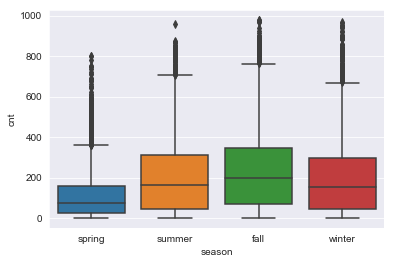

In [38]:
g = sns.boxplot(x='season', y='cnt', data=interm_df)
g.set(xticklabels=['spring', 'summer', 'fall', 'winter'])

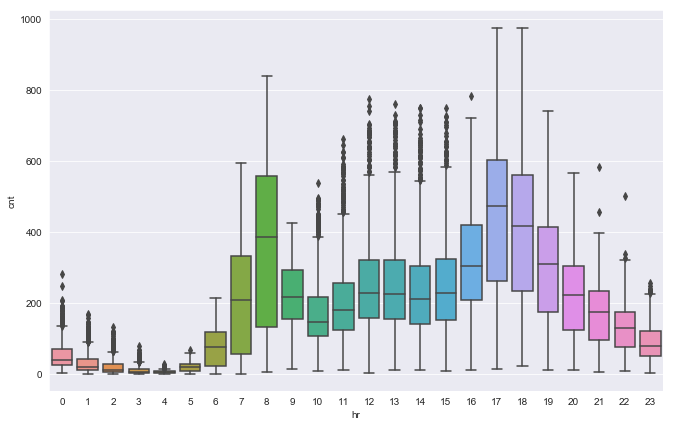

In [43]:
_, ax = pyplot.subplots(figsize=(11, 7))
g = sns.boxplot(ax=ax, x='hr', y='cnt', data=interm_df)

## Correlations

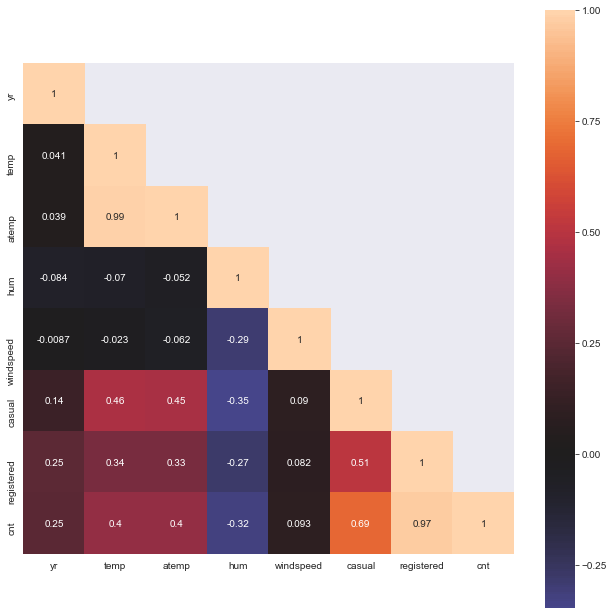

In [28]:
_, ax= pyplot.subplots(figsize=(11,11))

corr = interm_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
g = sns.heatmap(corr, annot=True, ax=ax, square=True, mask=mask, center=0)

## Distribution

((array([-3.94509974, -3.7271979 , -3.60788822, ...,  3.60788822,
          3.7271979 ,  3.94509974]),
  array([  1,   1,   1, ..., 970, 976, 977])),
 (169.56208274455787, 189.4630876345015, 0.9346293252087191))

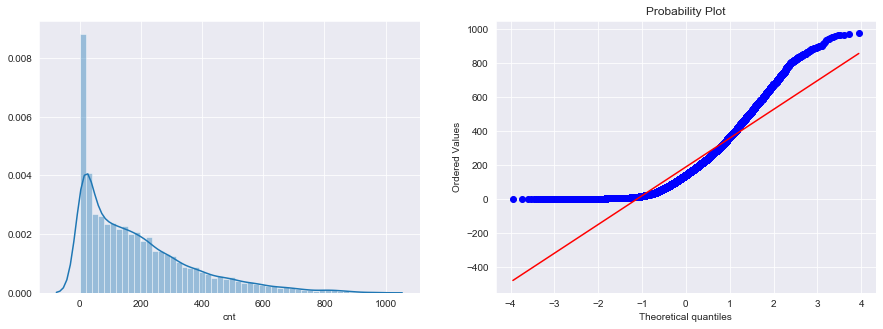

In [45]:
_,ax = pyplot.subplots(ncols=2,nrows=1, figsize=(15, 5))
sns.distplot(interm_df["cnt"],ax=ax[0])
stats.probplot(interm_df["cnt"], dist='norm', fit=True, plot=ax[1])

## Visualization

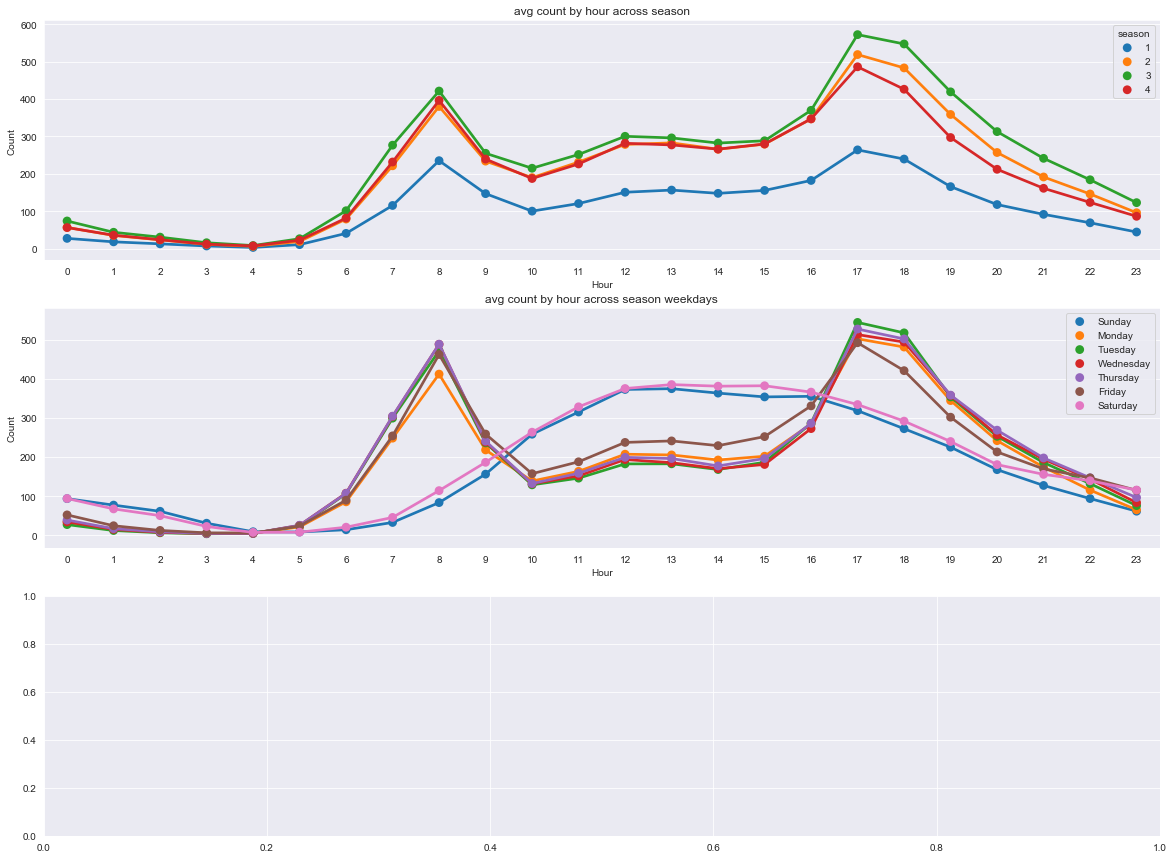

In [64]:
_,ax = pyplot.subplots(ncols=1,nrows=3, figsize=(20, 15))
day_label = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hours = pd.DataFrame(interm_df.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hours['hr'], y=hours["cnt"],hue=hours["season"], data=hours,ax=ax[0])
ax[0].set(xlabel='Hour', ylabel='Count',title="avg count by hour across season")

hours = pd.DataFrame(interm_df.groupby(["hr","weekday"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hours["hr"], y=hours["cnt"],hue=hours["weekday"], data=hours,ax=ax[1], legend_out = True)
ax[1].set(xlabel='Hour', ylabel='Count',title="avg count by hour across season weekdays")
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, day_label)
